# Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# librerias para crear la interface
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact_manual
from random import randint
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

# Obtener los Datos

In [2]:
from sklearn.datasets import fetch_olivetti_faces

caras = fetch_olivetti_faces()

#caras.DESCR

In [3]:
def mostrarCaras(images, target, top_n):
    # definir el tamaño de la configuracion de la matriz de imagenes
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)
    for i in range(top_n):
        #dibujar las imagenes en una matriz de 20x20
        d= fig.add_subplot(20,20, i+1, xticks=[], yticks=[])
        d.imshow(images[i], cmap=plt.cm.bone)
        
        # Etiquetada de cada imagen con target de tipo valor
        d.text(0, 14, str(target[i]))
        d.text(0, 60, str(i))

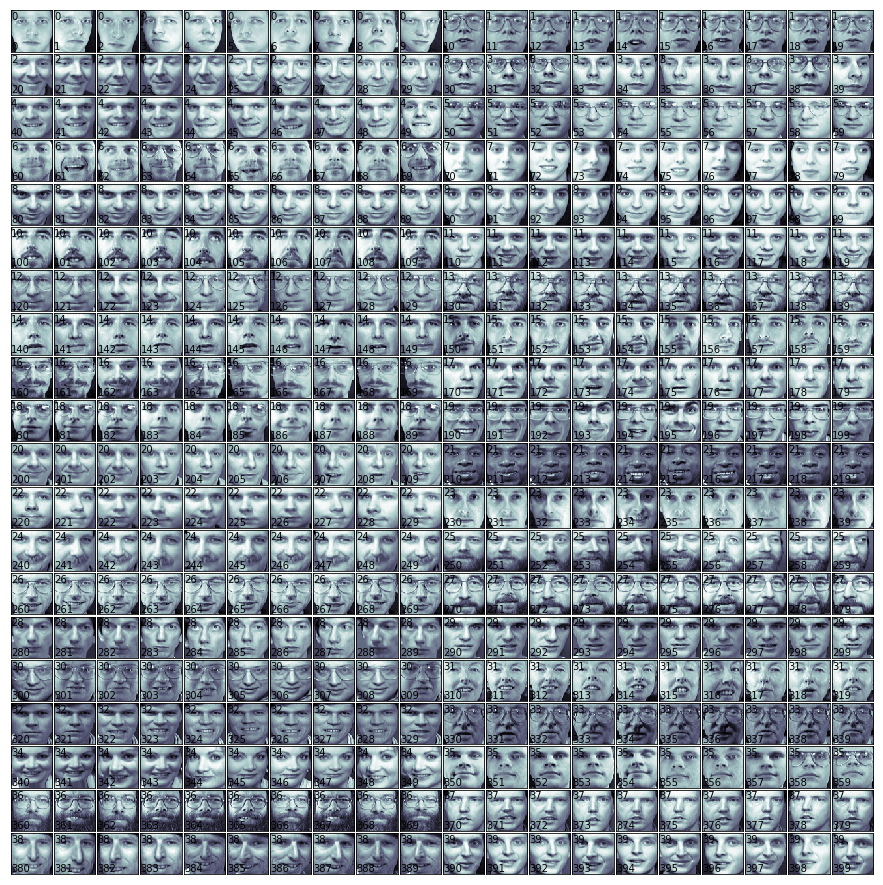

In [4]:
mostrarCaras(caras.images, caras.target, 400)

# Extraccion de Caracteristicas:

In [5]:
sonrisa = []
for i in caras.target:
    if(i == 2 or i == 4 or i == 8 or i == 9 or i == 11 or i == 12 or i == 16 or i == 19 or i == 20 or i == 21 or i == 24 or i == 26  or i == 32  or i == 34  or i == 38  or i == 39):
        sonrisa.append(1)
    else:
        sonrisa.append(0)

In [6]:
for i in range(0,400):
    if(i == 50 or i == 51 or i == 51 or i == 60 or i == 61 or i == 62 or i == 63 or i == 64 or i == 65 or i == 69 or i == 72 or i == 75 or i == 74 or i == 186 or i == 187 or i == 188 or i == 234 or i == 300 or i == 303 or i == 305 or i == 306 or i == 307 or i == 308 or i == 269 or i == 361 or i == 367):
        sonrisa[i] = 1

In [7]:
for i in range(0,400):
    if(i == 99 or i == 110 or i == 112 or i == 115 or i == 124 or i == 125 or i == 126 or i == 165 or i ==  166 or i == 167 or i == 168 or i == 169 or i == 199 or i == 203 or i == 209 or i == 320 or i == 321 or i == 322 or i == 329 or i == 345):
        sonrisa[i] = 0

# Vectores de Caracteristicas

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = caras.data # Es donde se encuentran todas las imagenes
y = sonrisa # Variable objetiva (es lo que se desea predecir)

In [10]:
X.shape

(400, 4096)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Algoritmo de Arboles de Decisión:

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier() # instancia de objeto de tipo arbol de decision

In [14]:
dtree.fit(X_train,y_train) # Aquí ya tenemos nuestro algoritmo entrenado

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediccion y Evaluacion

In [15]:
prediction = dtree.predict(X_test)

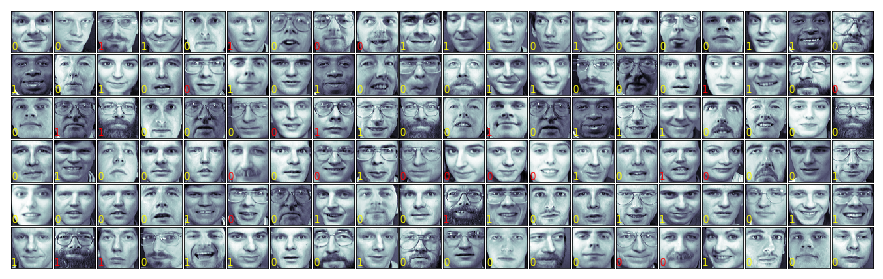

In [16]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)
cont1 = 0
for i in range(len(prediction)):
    #dibujar las imagenes en una matriz de 20x20
    d= fig.add_subplot(20,20, i+1, xticks=[], yticks=[])
    d.imshow(X_test.reshape(-1,64,64)[i], cmap=plt.cm.bone)

    # Etiquetada de cada imagen con target de tipo valor
    if prediction[i] == y_test[i]:
        d.text(0, 60, str(prediction[i]), color='yellow')
        cont1 = cont1 + 1
    else:
        d.text(0, 60, str(prediction[i]), color='red')

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82        71
          1       0.76      0.69      0.72        49

avg / total       0.78      0.78      0.78       120



In [19]:
print(confusion_matrix(y_test,prediction))

[[60 11]
 [15 34]]


In [20]:
button = widgets.Button(description="Muestra Aleatoria",layout=widgets.Layout(width='300px',button_style='success'))
display(button)

def on_button_clicked(b):
    clear_output(wait=False)
    display(button)
    
    num = randint(0,100)
    
    fig = plt.figure(figsize=(100,100))
    d=fig.add_subplot(20,20,1, xticks=[],yticks=[])
    
    d.imshow(X_test.reshape(-1,64,64)[num], cmap=plt.cm.bone)
    
    if prediction[num] == 1:
        etiqueta = 'Esta Sonriendo'
    else:
        etiqueta = 'No esta Sonriendo'
        
    if prediction[num] == y_test[num]:
        d.text(23,5, etiqueta, style='italic',
        bbox={'facecolor':'green','alpha':0.05, 'pad':10})
    else:
        d.text(23,5, etiqueta, style='italic',
        bbox={'facecolor':'red','alpha':0.05, 'pad':10})
        
button.on_click(on_button_clicked)

Button(description='Muestra Aleatoria', layout=Layout(width='300px'), style=ButtonStyle())

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
rfc_pred = rfc.predict(X_test)

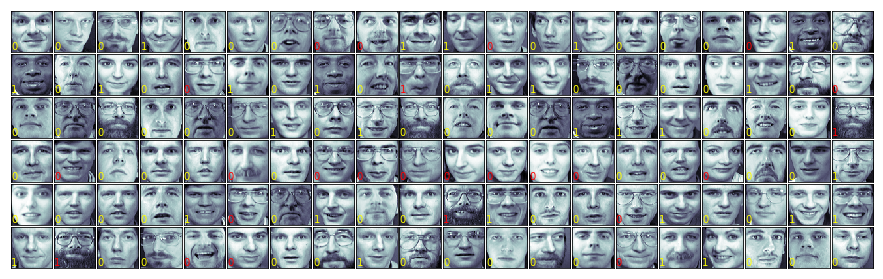

In [23]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)
cont1 = 0
for i in range(len(rfc_pred)):
    #dibujar las imagenes en una matriz de 20x20
    d= fig.add_subplot(20,20, i+1, xticks=[], yticks=[])
    d.imshow(X_test.reshape(-1,64,64)[i], cmap=plt.cm.bone)

    # Etiquetada de cada imagen con target de tipo valor
    if rfc_pred[i] == y_test[i]:
        d.text(0, 60, str(rfc_pred[i]), color='yellow')
        cont1 = cont1 + 1
    else:
        d.text(0, 60, str(rfc_pred[i]), color='red')

In [24]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.76      0.94      0.84        71
          1       0.88      0.57      0.69        49

avg / total       0.81      0.79      0.78       120



In [25]:
print(confusion_matrix(y_test,rfc_pred))

[[67  4]
 [21 28]]


In [26]:
button = widgets.Button(description="Muestra Aleatoria",layout=widgets.Layout(width='300px',button_style='success'))
display(button)

def on_button_clicked(b):
    clear_output(wait=False)
    display(button)
    
    num = randint(0,100)
    
    fig = plt.figure(figsize=(100,100))
    d=fig.add_subplot(20,20,1, xticks=[],yticks=[])
    
    d.imshow(X_test.reshape(-1,64,64)[num], cmap=plt.cm.bone)
    
    if rfc_pred[num] == 1:
        etiqueta = 'Esta Sonriendo'
    else:
        etiqueta = 'No esta Sonriendo'
        
    if rfc_pred[num] == y_test[num]:
        d.text(23,5, etiqueta, style='italic',
        bbox={'facecolor':'green','alpha':0.05, 'pad':10})
    else:
        d.text(23,5, etiqueta, style='italic',
        bbox={'facecolor':'red','alpha':0.05, 'pad':10})
        
button.on_click(on_button_clicked)

Button(description='Muestra Aleatoria', layout=Layout(width='300px'), style=ButtonStyle())

In [30]:
np.array(X_test).shape

(120, 4096)

In [31]:
rfc_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0])